In [30]:
library("tidyverse")
library("ggplot2")

In [31]:
dataset = read.csv("BankChurners.csv")
dataset <- dataset[, -c(22:23)]

In [32]:
summary(dataset)

   CLIENTNUM                   Attrition_Flag  Customer_Age   Gender  
 Min.   :708082083   Attrited Customer:1627   Min.   :26.00   F:5358  
 1st Qu.:713036770   Existing Customer:8500   1st Qu.:41.00   M:4769  
 Median :717926358                            Median :46.00           
 Mean   :739177606                            Mean   :46.33           
 3rd Qu.:773143533                            3rd Qu.:52.00           
 Max.   :828343083                            Max.   :73.00           
                                                                      
 Dependent_count      Education_Level  Marital_Status       Income_Category
 Min.   :0.000   College      :1013   Divorced: 748   $120K +       : 727  
 1st Qu.:1.000   Doctorate    : 451   Married :4687   $40K - $60K   :1790  
 Median :2.000   Graduate     :3128   Single  :3943   $60K - $80K   :1402  
 Mean   :2.346   High School  :2013   Unknown : 749   $80K - $120K  :1535  
 3rd Qu.:3.000   Post-Graduate: 516                 

In [9]:
str(dataset)

Classes 'tbl_df', 'tbl' and 'data.frame':	10127 obs. of  21 variables:
 $ CLIENTNUM               : num  7.69e+08 8.19e+08 7.14e+08 7.70e+08 7.09e+08 ...
 $ Attrition_Flag          : chr  "Existing Customer" "Existing Customer" "Existing Customer" "Existing Customer" ...
 $ Customer_Age            : num  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                  : chr  "M" "F" "M" "F" ...
 $ Dependent_count         : num  3 5 3 4 3 2 4 0 3 2 ...
 $ Education_Level         : chr  "High School" "Graduate" "Graduate" "High School" ...
 $ Marital_Status          : chr  "Married" "Single" "Married" "Unknown" ...
 $ Income_Category         : chr  "$60K - $80K" "Less than $40K" "$80K - $120K" "Less than $40K" ...
 $ Card_Category           : chr  "Blue" "Blue" "Blue" "Blue" ...
 $ Months_on_book          : num  39 44 36 34 21 36 46 27 36 36 ...
 $ Total_Relationship_Count: num  5 6 4 3 5 3 6 2 5 6 ...
 $ Months_Inactive_12_mon  : num  1 1 1 4 1 1 1 2 2 3 ...
 $ Contacts_Count_12_mon   : num

# Here we display the distribution of customers who leaves depending on their education level

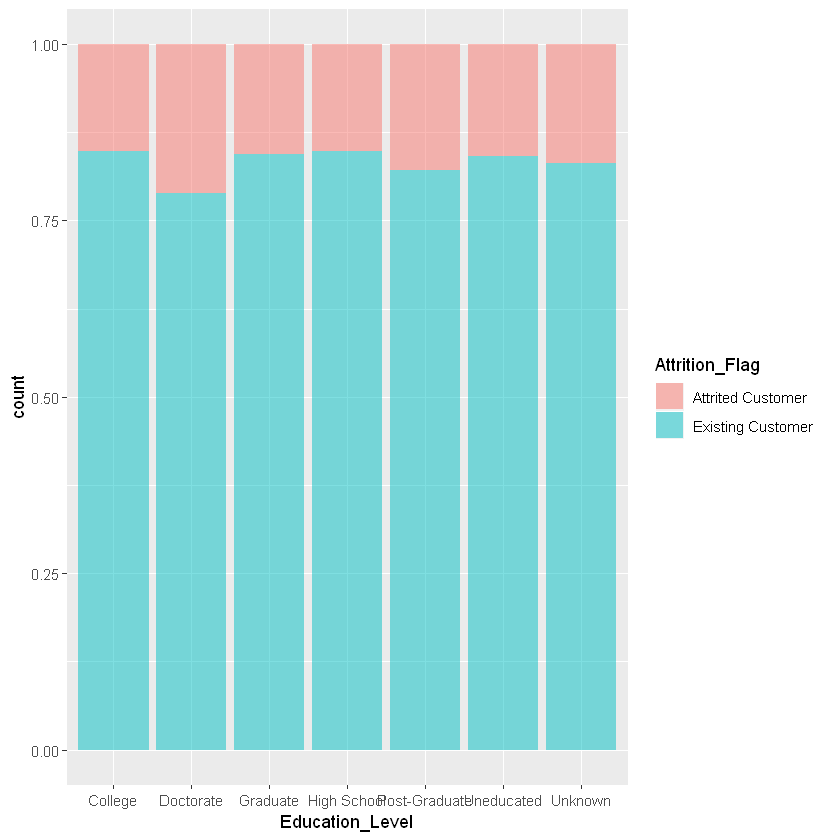

In [10]:
dataset %>%
ggplot(aes(x=Education_Level,fill=Attrition_Flag))+
geom_bar(alpha=0.5,position = "fill")

The Procentive distibution

In [11]:
dataset %>%
count(Education_Level,Attrition_Flag)%>%
group_by(Education_Level)%>%
mutate(p=n/sum(n)*100)

Education_Level,Attrition_Flag,n,p
College,Attrited Customer,154,15.20237
College,Existing Customer,859,84.79763
Doctorate,Attrited Customer,95,21.06430
Doctorate,Existing Customer,356,78.93570
Graduate,Attrited Customer,487,15.56905
Graduate,Existing Customer,2641,84.43095
High School,Attrited Customer,306,15.20119
High School,Existing Customer,1707,84.79881
Post-Graduate,Attrited Customer,92,17.82946
Post-Graduate,Existing Customer,424,82.17054


# The Distibution of customers leaving and the amount of inactive Months

In [12]:
Attrition_Flag_And_Inactive <- select(dataset, Attrition_Flag, Months_Inactive_12_mon)

In [13]:
Attrition_Flag_And_Inactive <- dataset %>%
count(Attrition_Flag, Months_Inactive_12_mon)%>%
group_by(Months_Inactive_12_mon) %>%
mutate(p=n/sum(n)*100)

Attrition_Flag_Attrited <- Attrition_Flag_And_Inactive %>%
filter(Attrition_Flag == "Attrited Customer")

Attrition_Flag_Existing <- Attrition_Flag_And_Inactive %>%
filter(Attrition_Flag == "Existing Customer")

Attrition_Flag_And_Months_Inactive = merge(x=Attrition_Flag_Attrited,y=Attrition_Flag_Existing,by="Months_Inactive_12_mon")

better_Attrition_Flag_And_Months_Inactive <- Attrition_Flag_And_Months_Inactive %>%
select(Months_Inactive_12_mon, p.x, p.y)

names(better_Attrition_Flag_And_Months_Inactive)[2] <- "Stays"
names(better_Attrition_Flag_And_Months_Inactive)[3] <-"Leaves"

In [14]:
better_Attrition_Flag_And_Months_Inactive

Months_Inactive_12_mon,Stays,Leaves
0,51.72414,48.27586
1,4.47828,95.52172
2,15.38696,84.61304
3,21.47686,78.52314
4,29.88506,70.11494
5,17.97753,82.02247
6,15.32258,84.67742


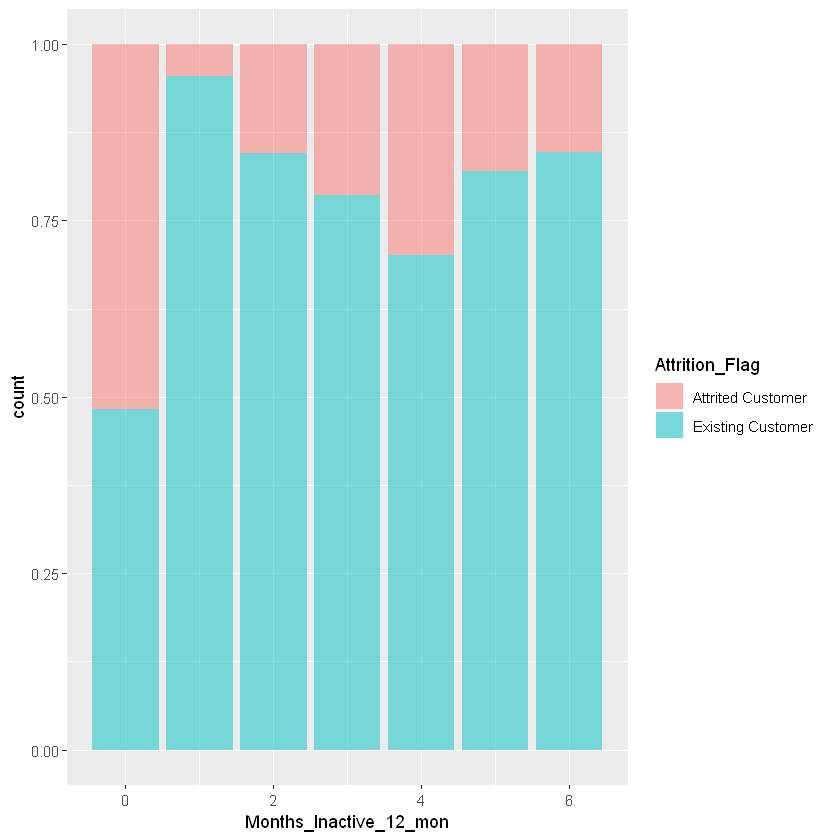

In [15]:
dataset %>%
ggplot(aes(x=Months_Inactive_12_mon,fill=Attrition_Flag))+
geom_bar(alpha=0.5,position = "fill")

In [84]:
test <- dataset %>%
filter(Attrition_Flag == "Attrited Customer") %>%
count(Education_Level,Attrition_Flag, Income_Category)%>%
mutate(p=n/sum(n)*100)

In [85]:
aggregate(n~Income_Category, test,sum)

Income_Category,n
$120K +,126
$40K - $60K,271
$60K - $80K,189
$80K - $120K,242
Less than $40K,612
Unknown,187


In [81]:
test

Education_Level,Attrition_Flag,Income_Category,n,p
College,Attrited Customer,$120K +,12,0.7375538
College,Attrited Customer,$40K - $60K,24,1.4751076
College,Attrited Customer,$60K - $80K,17,1.0448679
College,Attrited Customer,$80K - $120K,36,2.2126613
College,Attrited Customer,Less than $40K,49,3.0116779
College,Attrited Customer,Unknown,16,0.9834050
Doctorate,Attrited Customer,$120K +,8,0.4917025
Doctorate,Attrited Customer,$40K - $60K,11,0.6760910
Doctorate,Attrited Customer,$60K - $80K,7,0.4302397
Doctorate,Attrited Customer,$80K - $120K,11,0.6760910


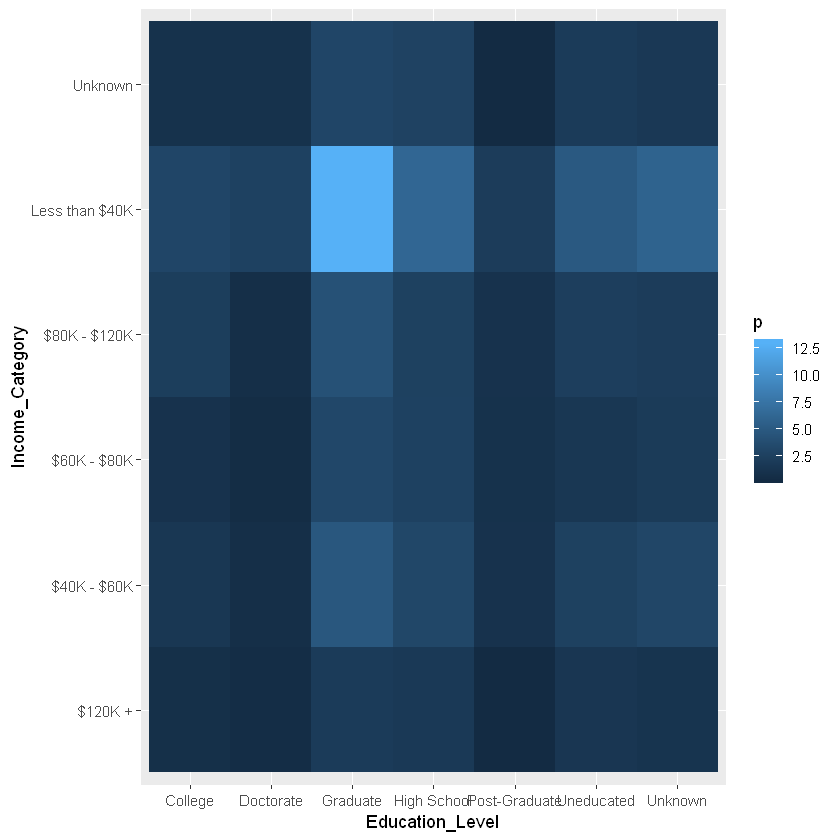

In [82]:
ggplot(test, aes(x = Education_Level, y = Income_Category, fill = p)) +
  geom_tile()

In [16]:
mean(dataset[dataset$Attrition_Flag == 'Existing Customer','Credit_Limit'])

Warning message in mean.default(dataset[dataset$Attrition_Flag == "Existing Customer", :
"argument is not numeric or logical: returning NA"

[1] NA

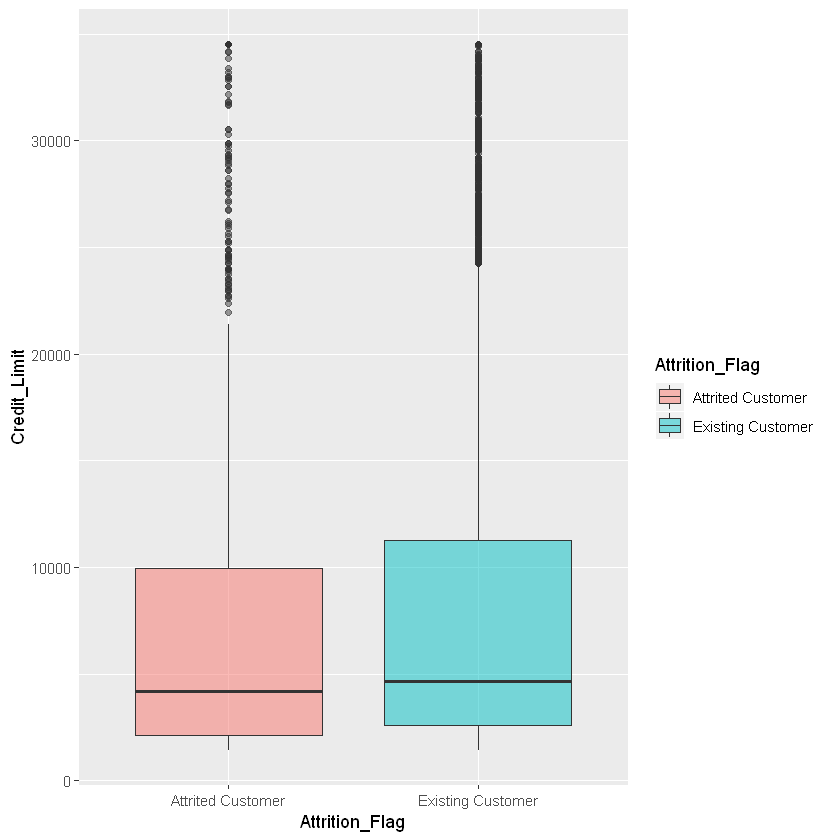

In [17]:
dataset%>%
#filter(Attrition_Flag)%>%
#ggplot(aes(x=Attrition_Flag,y=Credit_Limit,col=Attrition_Flag))+
ggplot(aes(x=Attrition_Flag,y=Credit_Limit,fill=Attrition_Flag))+
geom_boxplot(alpha=0.5)
